In [31]:
%matplotlib notebook
import numpy as np
from plantcv import plantcv as pcv
from matplotlib import pyplot as plt

In [95]:
pcv.params.debug = "plot"
pcv.params.text_size=5
pcv.params.text_thickness=10
pcv.params.line_thickness = 10

In [70]:
def plot_color_channels(img):
    # List of colormaps
    colors = ["Blues", "Greens", "Reds"]
    # Create a new figure with 3 subplots
    figure, plots = plt.subplots(ncols=3, nrows=1, constrained_layout=True)
    # iterate over each subplot
    for i, subplot in zip(range(3), plots):
        # Plot the ith image color channel with the ith colormap
        subplot.imshow(img[:, :, i], cmap=colors[i])
        # Turn off the coordinates
        subplot.set_axis_off()
    # Show the image
    plt.show()

# What is an image?
We will open an image and explore the components of it.

<IPython.core.display.Javascript object>


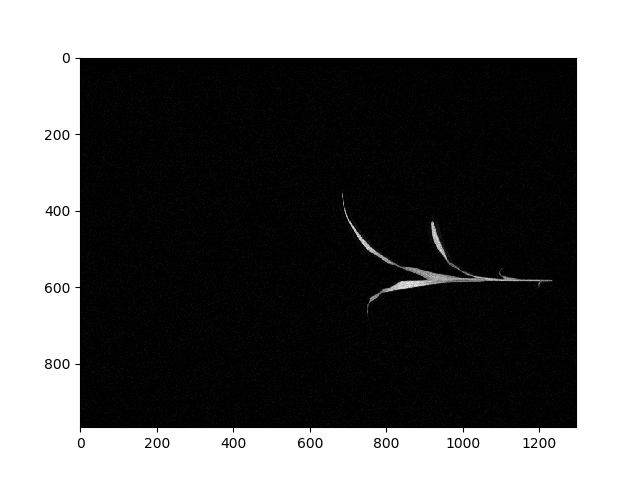

In [34]:
# Read in the image fmax.png
gray_img, graypath, grayname = pcv.readimage(filename="images/fmax.png")

# What are some things we notice about the image?

* The image is composed of small square elements, or pixels
* The pixel coordinate system origin is in the top left
* The coordinate system is left-handed, coordinate values increase down and right
* The image is composed of gray values (no color)

![2D gird](./figures/grid2D.png)

# How are images represented in Python?

In [21]:
# Use the Python type function to determine the data type of the image
type(gray_img)

numpy.ndarray

# Most common Python image analysis packages store images as NumPy arrays
[NumPy](https://numpy.org/) is a core package of the scientific Python community.

We can use NumPy to determine the shape and size of the image. The dimensions are in the order y, x, z for images.

We can also determine what type of data is stored in each pixel (dtype).

In [28]:
# Determine the shape and size of the image
gray_img.shape

(966, 1296)

In [27]:
# Determine the data type of the image
gray_img.dtype

dtype('uint16')

# Common image data types
uint = unsigned integer (no negative numbers)

8 = 8-bit (2^8 = 256 possible values. Darkest value = 0, brightest = 255)

16 = 16-bit (2^16 = 65,536 possible values. Darkest value = 0, brightest = 65,535)

In [35]:
# Calculate the minimum value observed in gray_img
np.min(gray_img)

0

In [36]:
# Calculate the maximum value observed in gray_img
np.max(gray_img)

7084

In [56]:
# Print the image data
gray_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 240,   0, ...,   0,   0,   0],
       [  0,  90,   0, ..., 111,   0,   0],
       [  0,  22, 134, ..., 284,   0, 136]], dtype=uint16)

<IPython.core.display.Javascript object>


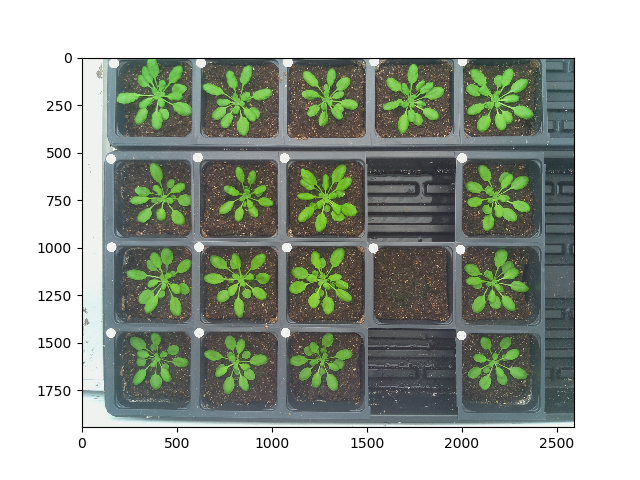

In [49]:
# Read a color image into the program
rgb_img, filepath, filename = pcv.readimage(filename="images/2017-02-28_1500_ch129-pos01.jpg")

# RGB images
This is a color image encoded using a Red Green Blue (RGB) color model.
Note that in OpenCV the color order is BGR.

In [50]:
# Determine the shape and size of the image
rgb_img.shape

(1944, 2592, 3)

In [51]:
# Determine the data type of the image
rgb_img.dtype

dtype('uint8')

In [52]:
# Calculate the minimum value observed in rgb_img
np.min(rgb_img)

0

In [53]:
# Calculate the maximum value observed in rgb_img
np.max(rgb_img)

255

<IPython.core.display.Javascript object>


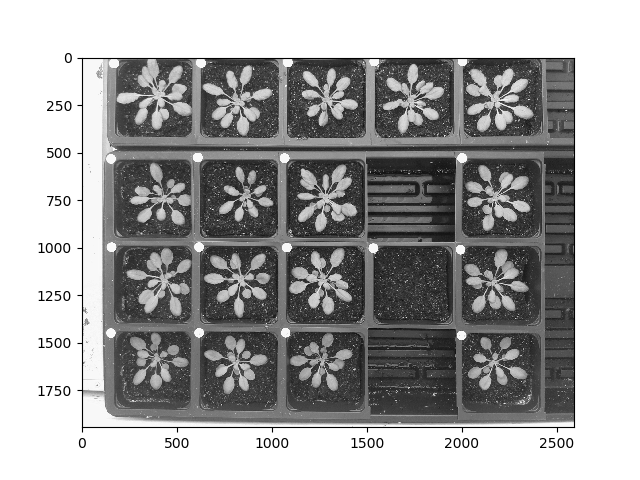

In [72]:
# Subset the green color channel
pcv.plot_image(img=rgb_img[:, :, 1])

<IPython.core.display.Javascript object>


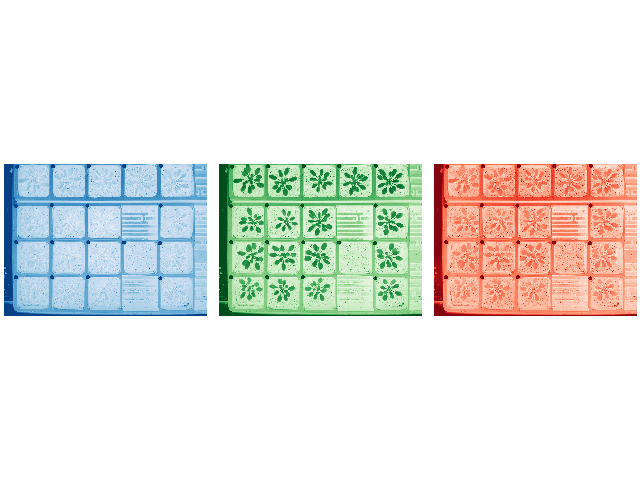

In [71]:
# Plot all three color channels
plot_color_channels(rgb_img)

<IPython.core.display.Javascript object>


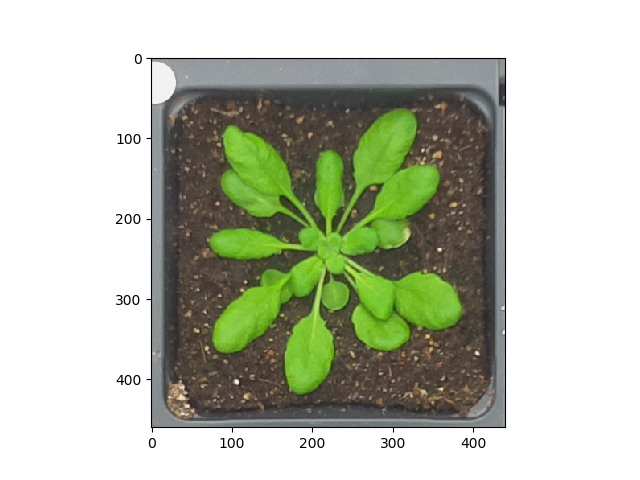

In [76]:
# Subset the gray_img spatially
img = rgb_img[500:960, 1060:1500]
pcv.plot_image(img)

In [77]:
# Print dimensions of subset image
np.shape(img)

(460, 440, 3)

# How do we label which pixels are plant (or background)?

<IPython.core.display.Javascript object>


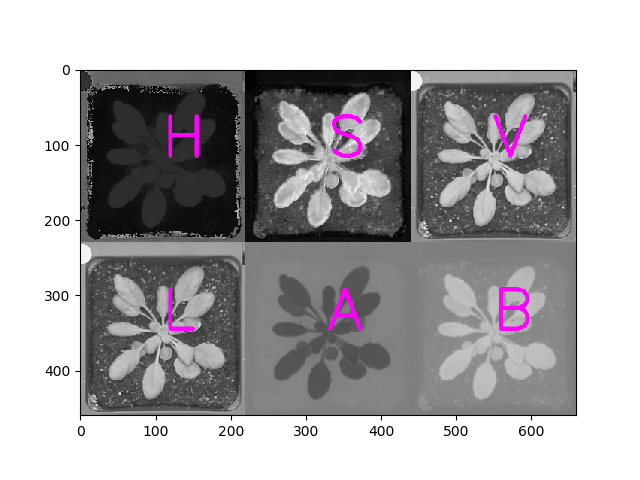

In [82]:
# Visualize colorspaces
cs_plot = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

<IPython.core.display.Javascript object>


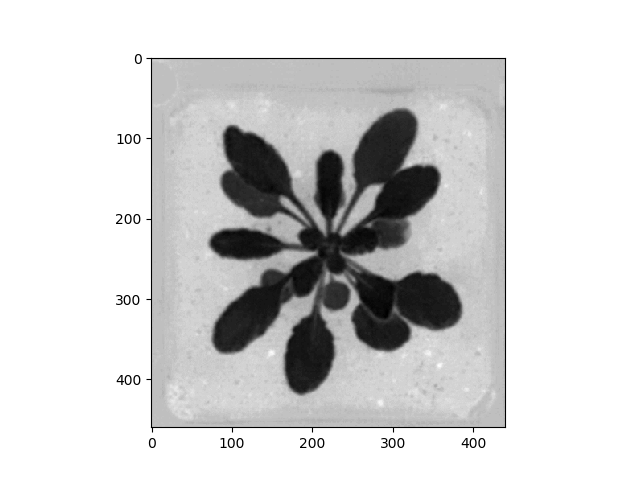

In [83]:
# Convert RGB image to grayscale
a_img = pcv.rgb2gray_lab(rgb_img=img, channel="a")

<IPython.core.display.Javascript object>


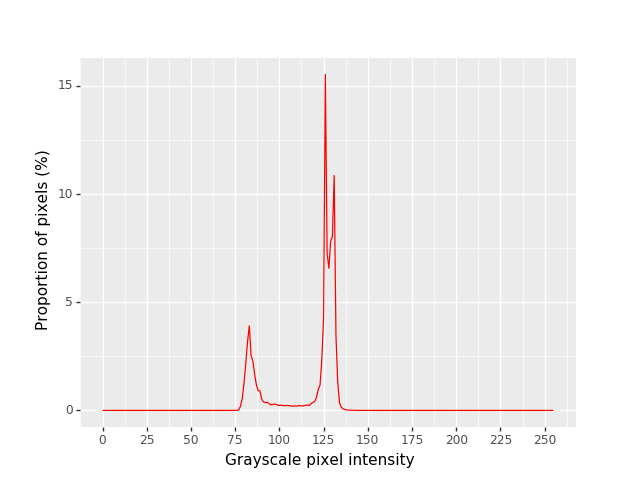

<ggplot: (8793556464877)>


In [84]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(gray_img=a_img)

<IPython.core.display.Javascript object>


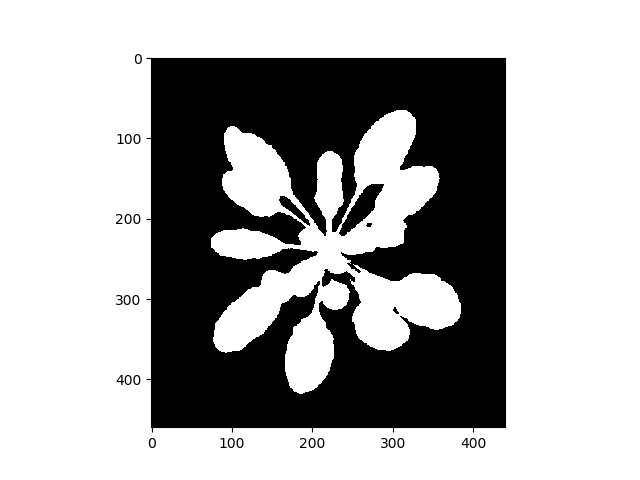

In [85]:
# Threshold the grayscale image
bin_img = pcv.threshold.binary(gray_img=a_img, threshold=100, max_value=255, object_type="dark")

# The binary image is a labeled image
In the binary image, the foreground is labeled "white" with the pixel value 255, and the background is labeled "black" with the pixel value 0

<IPython.core.display.Javascript object>


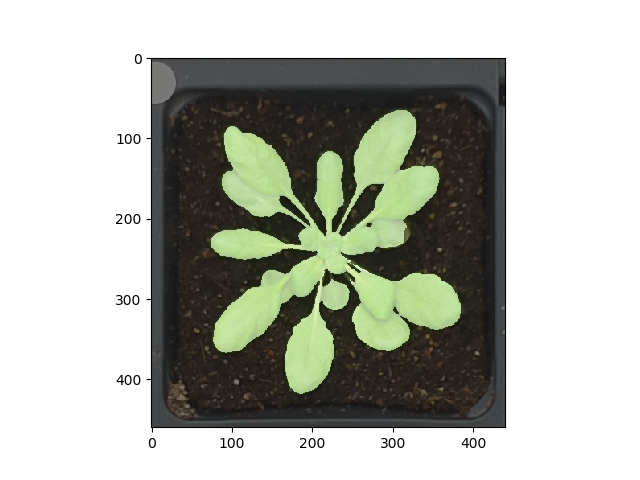

In [86]:
overlay = pcv.visualize.overlay_two_imgs(img1=img, img2=bin_img)

<IPython.core.display.Javascript object>


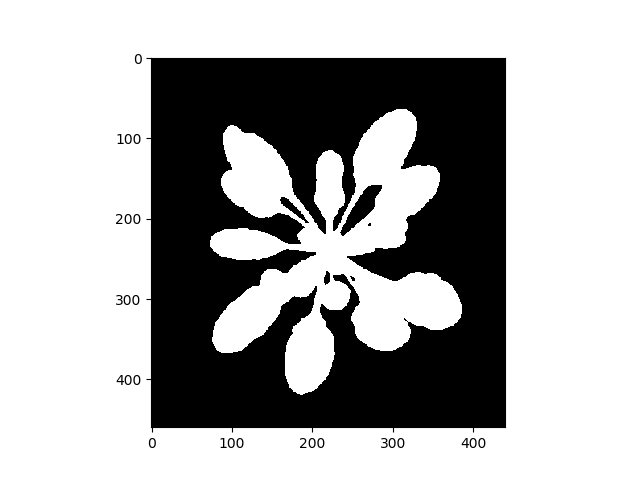

In [87]:
# Try an auto-threshold method
bin_img = pcv.threshold.otsu(gray_img=a_img,max_value=255, object_type="dark")

<IPython.core.display.Javascript object>


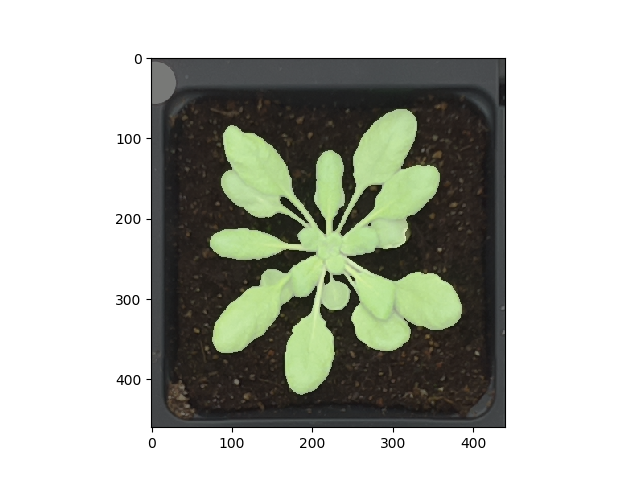

In [88]:
# Overlay the mask over the RGB image
overlay = pcv.visualize.overlay_two_imgs(img1=img, img2=bin_img)

<IPython.core.display.Javascript object>


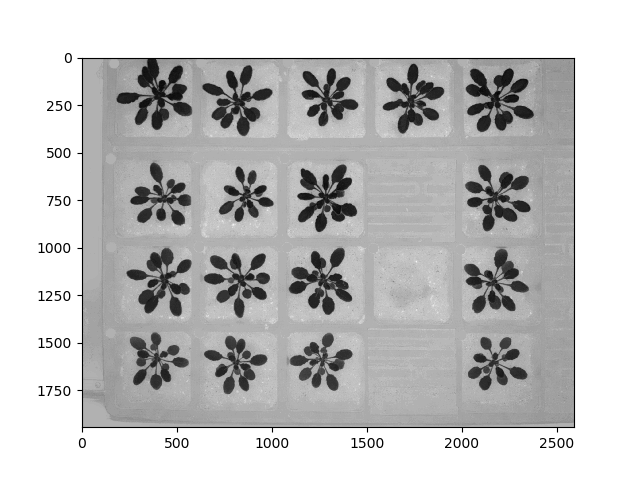

In [89]:
# Convert RGB image to grayscale
a_img = pcv.rgb2gray_lab(rgb_img=rgb_img, channel="a")

<IPython.core.display.Javascript object>


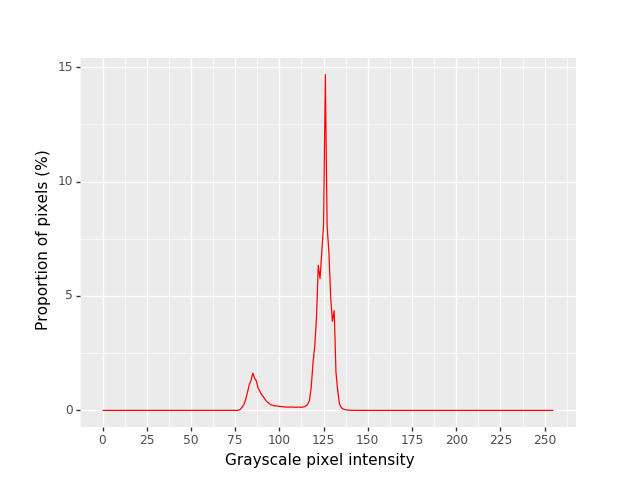

<ggplot: (8793586637969)>


In [90]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(gray_img=a_img)

<IPython.core.display.Javascript object>


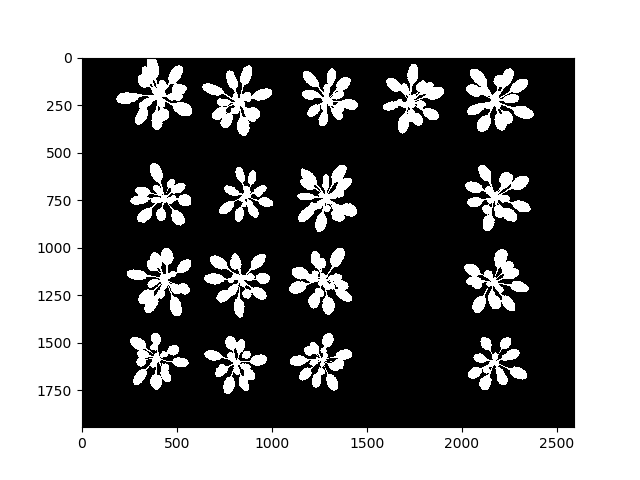

In [91]:
# Try an auto-threshold method
bin_img = pcv.threshold.otsu(gray_img=a_img,max_value=255, object_type="dark")

<IPython.core.display.Javascript object>


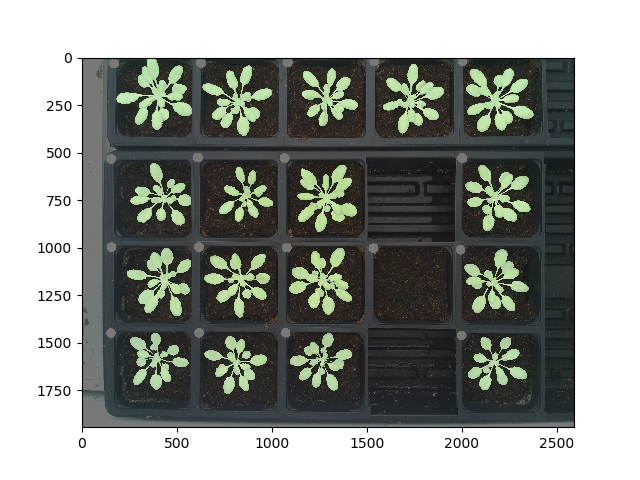

In [93]:
# Overlay the mask over the RGB image
overlay = pcv.visualize.overlay_two_imgs(img1=rgb_img, img2=bin_img)

<IPython.core.display.Javascript object>


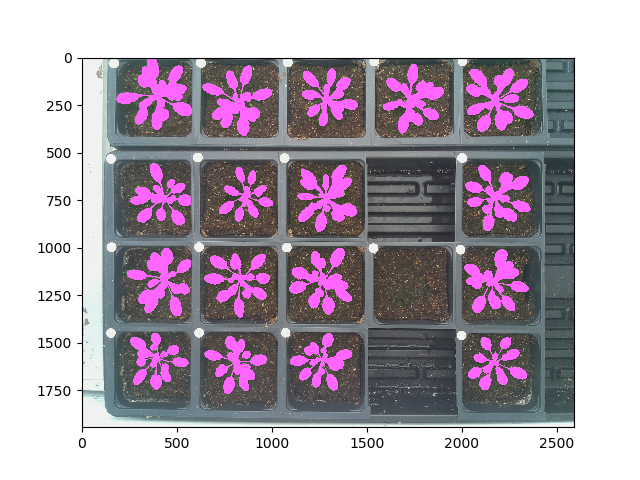

In [94]:
# Convert binary mask to contours (connected components)
cnt, cnt_str = pcv.find_objects(img=rgb_img, mask=bin_img)

# We have contours for individual plants, how do we measure them individually?

<IPython.core.display.Javascript object>


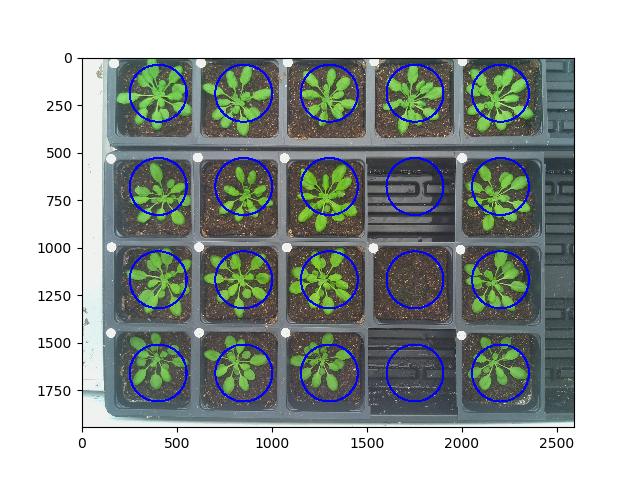

In [104]:
# Create a region of interest (ROI) for each pot 
rois, rois_str = pcv.roi.multi(img=rgb_img, coord=(400, 190), radius=150, spacing=(450, 490), nrows=4, ncols=5)

In [106]:
# Create a list of plant IDs
plant_ids = range(0, len(rois))

range(0, 20)


In [107]:
# Select one plant
i = 0
roi = rois[i]
roi_str = rois_str[i]
plant_id = plant_ids[i]

<IPython.core.display.Javascript object>


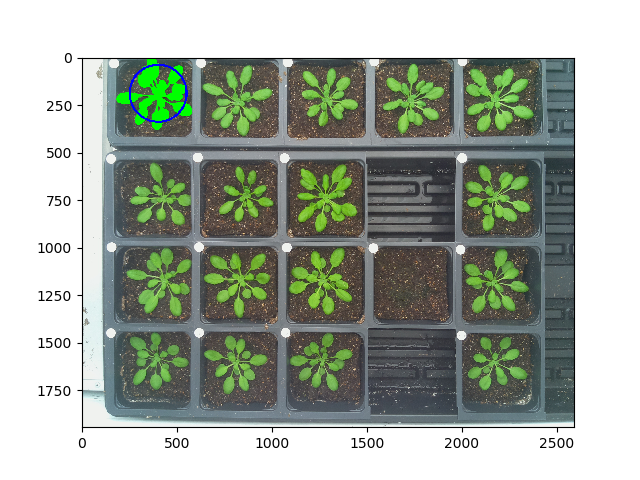

<IPython.core.display.Javascript object>


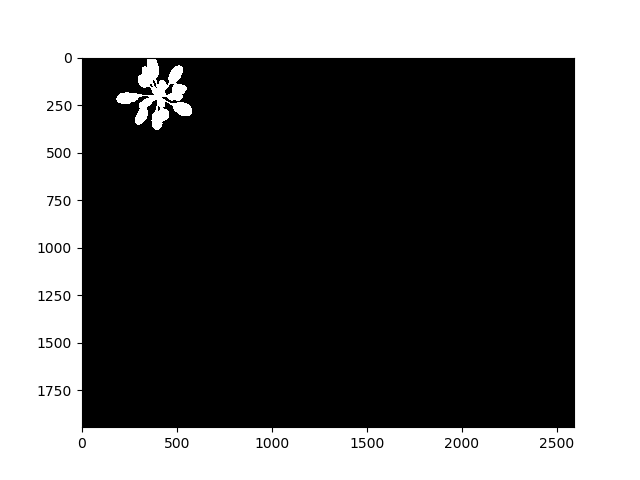

In [108]:
# Filter contours associated with one plant
plant_cnt, plant_str, plant_mask, plant_area = pcv.roi_objects(img=rgb_img, roi_contour=roi, roi_hierarchy=roi_str, object_contour=cnt, obj_hierarchy=cnt_str)

/Users/nfahlgren/opt/miniconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.11.0-py3.7.egg/plantcv/plantcv/plot_image.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


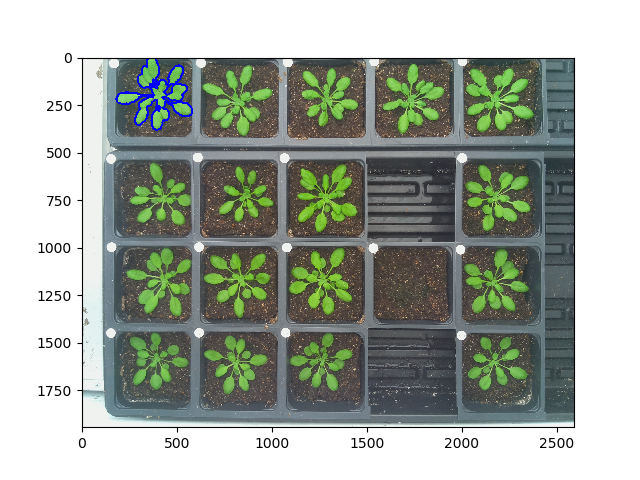

In [109]:
# Combine contours into one object
plant, plant_mask = pcv.object_composition(img=rgb_img, contours=plant_cnt, hierarchy=plant_str)

/Users/nfahlgren/opt/miniconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.11.0-py3.7.egg/plantcv/plantcv/plot_image.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


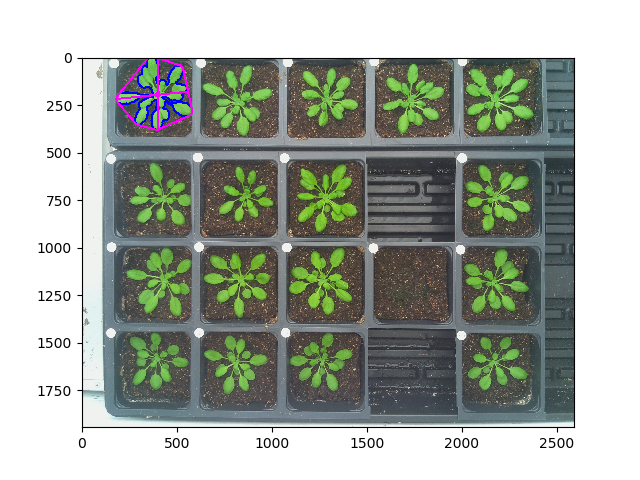

In [110]:
# Measure the plant object
shape_img = pcv.analyze_object(img=rgb_img, obj=plant, mask=plant_mask, label=plant_id)

In [111]:
# Print measurements
pcv.outputs.observations

{0: {'in_bounds': {'trait': 'whether the plant goes out of bounds ',
   'method': 'plantcv.plantcv.within_frame',
   'scale': 'none',
   'datatype': "<class 'bool'>",
   'value': False,
   'label': 'none'},
  'area': {'trait': 'area',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'pixels',
   'datatype': "<class 'int'>",
   'value': 59645.0,
   'label': 'pixels'},
  'convex_hull_area': {'trait': 'convex hull area',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'pixels',
   'datatype': "<class 'int'>",
   'value': 104061.0,
   'label': 'pixels'},
  'solidity': {'trait': 'solidity',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'none',
   'datatype': "<class 'float'>",
   'value': 0.573173427124475,
   'label': 'none'},
  'perimeter': {'trait': 'perimeter',
   'method': 'plantcv.plantcv.analyze_object',
   'scale': 'pixels',
   'datatype': "<class 'int'>",
   'value': 2866.390163421631,
   'label': 'pixels'},
  'width': {'trait': 'width',
   'method

/Users/nfahlgren/opt/miniconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.11.0-py3.7.egg/plantcv/plantcv/plot_image.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


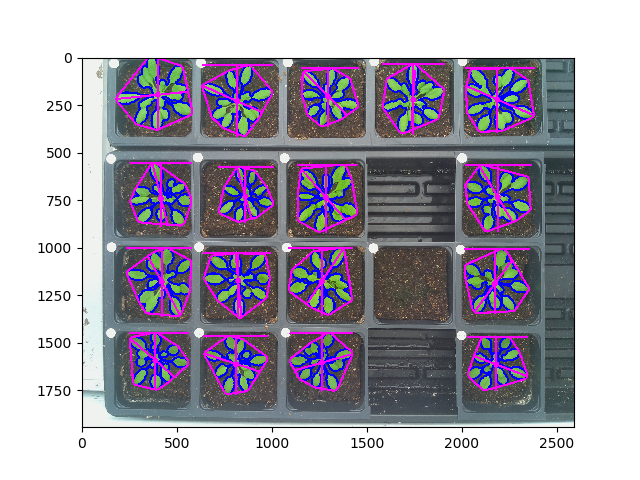

In [112]:
# Loop over all plants
shape_img = np.copy(rgb_img)
pcv.params.debug = None

for i in range(0, len(rois)):
    # Select the ith plant
    roi = rois[i]
    roi_str = rois_str[i]
    plant_id = plant_ids[i]
    # Filter contours associated with one plant
    plant_cnt, plant_str, plant_mask, plant_area = pcv.roi_objects(img=rgb_img, roi_contour=roi, roi_hierarchy=roi_str, object_contour=cnt, obj_hierarchy=cnt_str)
    if plant_area > 0:
        # Combine contours into one object
        plant, plant_mask = pcv.object_composition(img=rgb_img, contours=plant_cnt, hierarchy=plant_str)
        # Measure the plant object
        shape_img = pcv.analyze_object(img=shape_img, obj=plant, mask=plant_mask, label=plant_id)
pcv.plot_image(shape_img)

In [115]:
# Print the rosette area of each plant
for i in plant_ids:
    measurements = pcv.outputs.observations.get(i)
    if measurements:
        area = pcv.outputs.observations[i]['area']['value']
    else:
        area = 0
    print(f"Plant {i}: {area}")

Plant 0: 59645.0
Plant 1: 48847.0
Plant 2: 39434.0
Plant 3: 46148.0
Plant 4: 56811.0
Plant 5: 40215.0
Plant 6: 29728.0
Plant 7: 51965.0
Plant 8: 0
Plant 9: 48148.0
Plant 10: 48733.0
Plant 11: 45741.0
Plant 12: 48472.0
Plant 13: 0
Plant 14: 45578.0
Plant 15: 36144.0
Plant 16: 36517.0
Plant 17: 36228.0
Plant 18: 0
Plant 19: 33941.0
